# Pymaceuticals Inc.
---

### Analysis

- What i see from this script and the data presented si that there are many different ways to see the data but there are definatly differences between men and women that take each of the drugs. Along with that when you look at the scatter plot tables it shows that there is a direct correlation between mouse weight and the tumor volume.
 

In [49]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_df = pd.merge(mouse_metadata,study_results,how='left')

# Display the data table for preview
combined_df.head(20)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


In [50]:
# Checking the number of mice.
mice_count = combined_df["Mouse ID"].unique().size
mice_count

249

In [51]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mouse = combined_df[combined_df.duplicated(subset=['Mouse ID', 'Timepoint'])]
duplicate_mouse

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [52]:
# Optional: Get all the data for the duplicate mouse ID. 


In [53]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mice = combined_df[combined_df["Mouse ID"] != "g989"]
clean_mice

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [54]:
# Checking the number of mice in the clean DataFrame.
clean_mice_count = clean_mice["Mouse ID"].unique().size
clean_mice_count

248

## Summary Statistics

In [55]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
regimen_group = clean_mice.groupby(clean_mice["Drug Regimen"])

# calculate statistics
mice_mean = regimen_group["Tumor Volume (mm3)"].mean()
mice_median = regimen_group["Tumor Volume (mm3)"].median()
mice_var = regimen_group["Tumor Volume (mm3)"].var()
mice_std = regimen_group["Tumor Volume (mm3)"].std()
mice_sem = regimen_group["Tumor Volume (mm3)"].sem()


# Assemble the resulting series into a single summary dataframe.
stat_summ = pd.DataFrame({ "Mean Tumour Volume": mice_mean,
                            "Median Tumour Volume": mice_median,
                            "Tumour Volume Variance": mice_var,
                            "Tumour Volume Standard Deviation": mice_std,
                            "Tumour Volume Standard Error": mice_sem }).style.set_caption("Summary Stastics for Tumour Volume (mm3)")
stat_summ

,Mean Tumour Volume,Median Tumour Volume,Tumour Volume Variance,Tumour Volume Standard Deviation,Tumour Volume Standard Error
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [56]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
stat_agg = clean_mice[["Tumor Volume (mm3)", "Drug Regimen"]].groupby(["Drug Regimen"]).agg(["mean", "median", "var", "std", "sem"]).style.set_caption("Summary Stastics")
stat_agg

## Bar and Pie Charts

<Axes: xlabel='Drug Regimen', ylabel='Timepoint'>

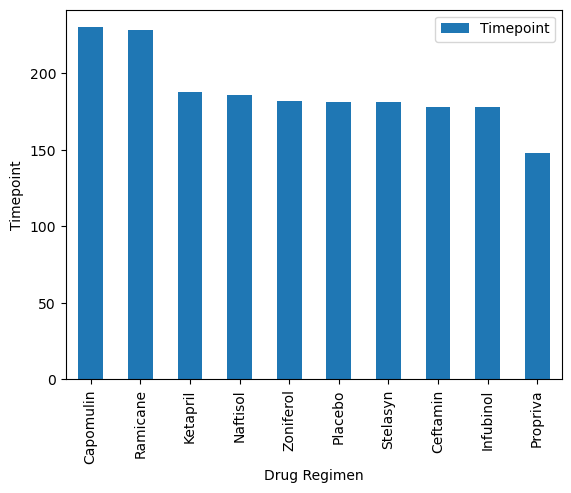

In [57]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
# Get data grouped by Drug Regimen
total_timepoints = clean_mice[["Timepoint", "Drug Regimen"]].groupby(["Drug Regimen"]).count()

# Sort data for plotting
sorted_timepoints = total_timepoints.sort_values(["Timepoint"], ascending=False)

# Plot bar chart using pandas
timepoints_plot = sorted_timepoints.plot.bar()
timepoints_plot.set_ylabel("Timepoint")

timepoints_plot

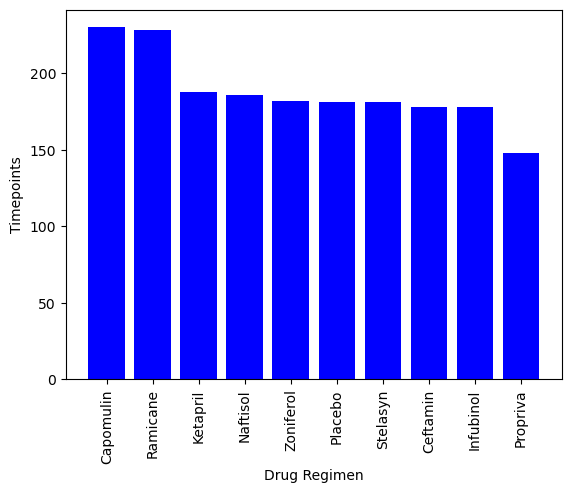

In [58]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
# Sort data for plotting
plt.bar(sorted_timepoints.index, sorted_timepoints['Timepoint'], color='b', alpha=1, align='center')

# Set axis labels
plt.ylabel('Timepoints') 
plt.xlabel('Drug Regimen')
plt.xticks(rotation='vertical')

# Show plot using pyplot
plt.show()

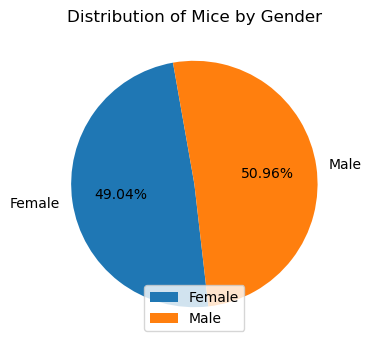

In [59]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
# Group by gender
mice_gender = clean_mice.groupby(["Sex"]).count()
gender_plot = mice_gender.plot.pie(startangle=100, y = "Mouse ID", title= "Distribution of Mice by Gender", autopct= "%1.2f%%", figsize=(4, 4))

# Set legend location, remove label
gender_plot.legend(loc="lower center")
gender_plot.set_ylabel("")

# Show clean plot
plt.show()

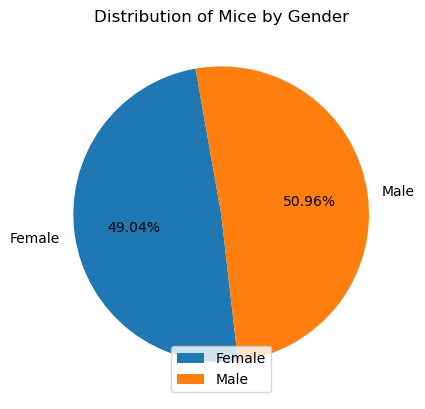

In [60]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
# Group by gender
mice_gender = clean_mice.groupby(["Sex"])["Sex"].count()
plt.pie(mice_gender, startangle=100, autopct='%1.2f%%', labels=('Female', 'Male'))

# add title, headings and legend
plt.title("Distribution of Mice by Gender")
plt.legend(labels=('Female', 'Male'), loc='lower center')

# show clean plot
plt.show()

## Quartiles, Outliers and Boxplots

In [61]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
greatest_timepoints = clean_mice.groupby(["Mouse ID"])["Timepoint"].max()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
greatest_merge = pd.merge(greatest_timepoints, clean_mice, on=("Mouse ID", "Timepoint"))
greatest_merge.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1


In [62]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]


# Create empty list to fill with tumor vol data (for plotting)
capomulin_data = []
ramicane_data = []
infubinol_data = []
ceftamin_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
for index, row in greatest_merge.iterrows():   
    if row["Drug Regimen"] == treatments[0]:
        capomulin_data.append(row['Tumor Volume (mm3)'])
    if row["Drug Regimen"] == treatments[1]:
        ramicane_data.append(row['Tumor Volume (mm3)'])
    if row["Drug Regimen"] == treatments[2]:
        infubinol_data.append(row['Tumor Volume (mm3)'])
    if row["Drug Regimen"] == treatments[3]:
        ceftamin_data.append(row['Tumor Volume (mm3)'])      
   
    
    # add subset 
treatments_df = pd.DataFrame({treatments[0]: capomulin_data,
                       treatments[1]: ramicane_data,
                       treatments[2]: infubinol_data,
                       treatments[3]: ceftamin_data
                       })

treatments_df.head()
    
    # Determine outliers using upper and lower bounds
# Capomulin
cap_q1 = np.percentile(capomulin_data, 25, interpolation = 'midpoint')
cap_q2 = np.percentile(capomulin_data, 50, interpolation = 'midpoint') 
cap_q3 = np.percentile(capomulin_data, 75, interpolation = 'midpoint') 
cap_iqr = cap_q3 - cap_q1
cap_low = cap_q1 - (1.5 * cap_iqr)
cap_up = cap_q3 + (1.5 * cap_iqr)

# Ramicane
ram_q1 = np.percentile(ramicane_data, 25, interpolation = 'midpoint')
ram_q2 = np.percentile(ramicane_data, 50, interpolation = 'midpoint') 
ram_q3 = np.percentile(ramicane_data, 75, interpolation = 'midpoint') 
ram_iqr = ram_q3 - ram_q1
ram_iqr = ram_q3 - ram_q1
ram_low = ram_q1 - (1.5 * ram_iqr)
ram_up = ram_q3 + (1.5 * ram_iqr)

# Infubinol
inf_q1 = np.percentile(infubinol_data, 25, interpolation = 'midpoint')
inf_q2 = np.percentile(infubinol_data, 50, interpolation = 'midpoint') 
inf_q3 = np.percentile(infubinol_data, 75, interpolation = 'midpoint') 
inf_iqr = inf_q3 - inf_q1 
inf_iqr = inf_q3 - inf_q1
inf_low = inf_q1 - (1.5 * inf_iqr)
inf_up = inf_q3 + (1.5 * inf_iqr)

# Ceftamin
cef_q1 = np.percentile(ceftamin_data, 25, interpolation = 'midpoint') 
cef_q2 = np.percentile(ceftamin_data, 50, interpolation = 'midpoint')
cef_q3 = np.percentile(ceftamin_data, 75, interpolation = 'midpoint') 
cef_iqr = cef_q3 - cef_q1 
cef_iqr = cef_q3 - cef_q1
cef_low = cef_q1 - (1.5 * cef_iqr)
cef_up = cef_q3 + (1.5 * cef_iqr)
    
# Determine outliers using upper and lower bounds
outlier_cap =[]
outlier_ram = []
outlier_inf = []
outlier_cef = []

for x in capomulin_data:
    if ((x> cap_up) or (x<cap_low)):
         outlier_cap.append(x)
            
for x in ramicane_data:
    if ((x > ram_up) or (x < ram_low)):
         outlier_ram.append(x)
            
for x in infubinol_data:
    if ((x > inf_up) or (x < inf_low)):
         outlier_inf.append(x)
            
for x in ceftamin_data:
    if ((x > cef_up) or (x < cef_low)):
         outlier_cef.append(x)

# Output results
print('Outliers in the Capomulin dataset are', outlier_cap)
print('Outliers in the Ramicane dataset are', outlier_ram)
print('Outliers in the Infubinol dataset are', outlier_inf)
print('Outliers in the Ceftamin dataset are', outlier_cef)

Outliers in the Capomulin dataset are []
Outliers in the Ramicane dataset are []
Outliers in the Infubinol dataset are [36.3213458]
Outliers in the Ceftamin dataset are []


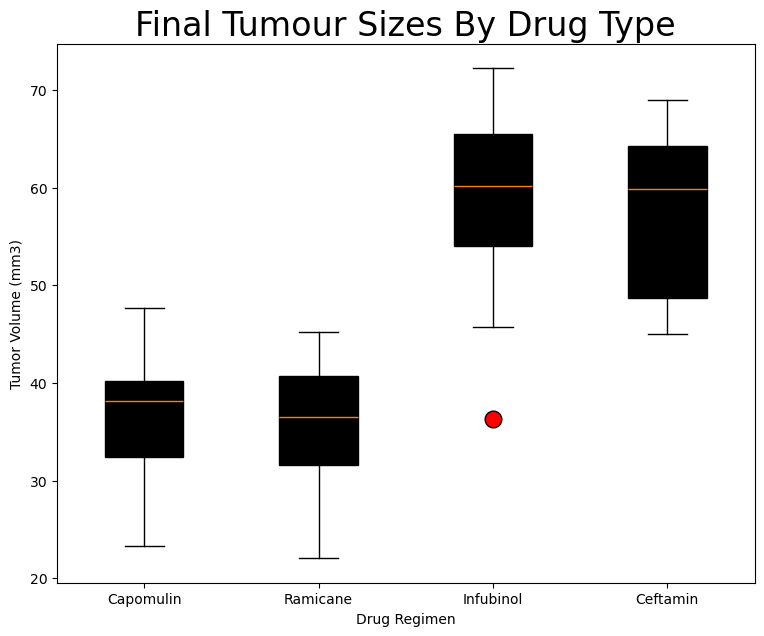

In [63]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
outliers = dict(marker='o', markerfacecolor='red', markersize=12)

# Lists to plot
plot_list = [treatments_df[treatments[0]],
                treatments_df[treatments[1]],
                treatments_df[treatments[2]],
                treatments_df[treatments[3]]]

# Plot output and styling
fig1, ax = plt.subplots(figsize=(9,7))
ax.set_title('Final Tumour Sizes By Drug Type', fontsize = 24) 
ax.set_xlabel('Drug Regimen') 
ax.set_ylabel('Tumor Volume (mm3)') 
ax.boxplot(plot_list, patch_artist=True, boxprops=dict(facecolor='black'), showmeans=False, flierprops=outliers)
plt.xticks([1,2,3,4], treatments)
plt.show()

## Line and Scatter Plots

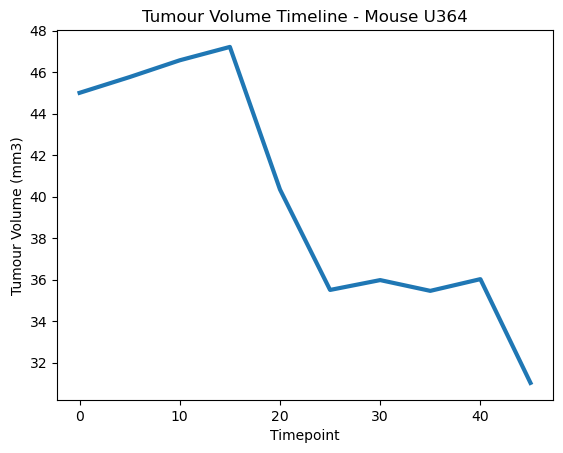

In [64]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
mouse_364 = clean_mice.loc[clean_mice["Mouse ID"] == "u364",:]

# set plot axis data
x_mouse = mouse_364["Timepoint"]
y_mouse = mouse_364["Tumor Volume (mm3)"]

# Plot output and styling
plt.xlabel('Timepoint')
plt.ylabel('Tumour Volume (mm3)')
plt.title("Tumour Volume Timeline - Mouse U364")
plt.plot(x_mouse, y_mouse, linewidth=3) 
plt.show()

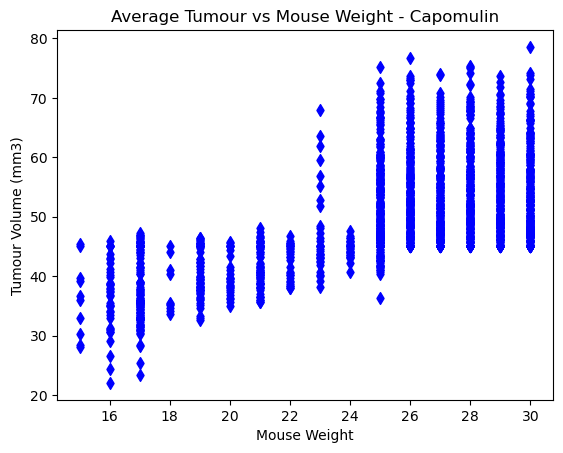

In [65]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
campoulin_df = clean_mice
average_weight = campoulin_df["Weight (g)"]
average_volume = campoulin_df["Tumor Volume (mm3)"]

# Plot output and styling
plt.scatter(campoulin_df["Weight (g)"], campoulin_df["Tumor Volume (mm3)"], marker="d", facecolors="blue")
plt.xlabel("Mouse Weight")
plt.ylabel("Tumour Volume (mm3)")
plt.title("Average Tumour vs Mouse Weight - Capomulin")
plt.show()

## Correlation and Regression

The correlation between mouse weight and average tumour volume is PearsonRResult(statistic=0.5881275121987515, pvalue=2.4476103457947302e-175)


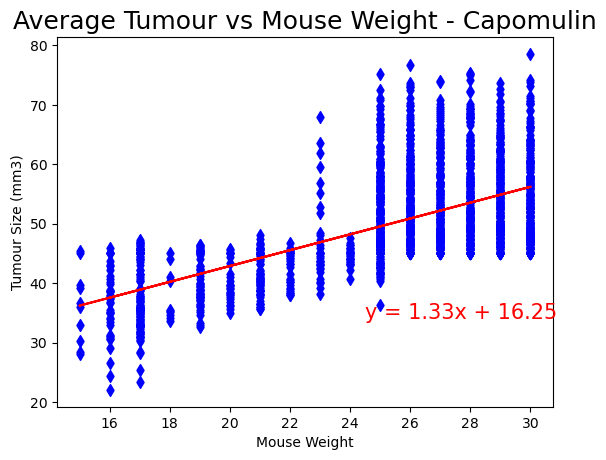

In [66]:
# Calculate the correlation coefficient and a linear regression model 
co_co = st.pearsonr(average_weight, average_volume)
print(f"The correlation between mouse weight and average tumour volume is {co_co}")
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
reg_model = linregress(average_weight,average_volume)
(slope, intercept, rvalue, pvalue, stderr) = reg_model
co_plot = average_weight * slope + intercept

# Plot line reg
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot main data
plt.scatter(average_weight, average_volume, marker="d", facecolors="blue")
plt.plot(average_weight, co_plot, color="red")

# Plot output and styling
plt.xlabel("Mouse Weight")
plt.ylabel("Tumour Size (mm3)")
plt.title("Average Tumour vs Mouse Weight - Capomulin", fontsize=18)
plt.annotate(line_eq,(24.5,34),fontsize=15,color="red")
plt.show()